# Dynamical Decoupling (DD) Simulation
## Specific case: m=2 and t1=t2=t
Ideal system:  **$e^{-iZt}$** \
Noisy system: **$e^{-i(Z+\lambda{X})t}$**
#### Want to prove: 
**$e^{-i(Z+\lambda{X})t}Ze^{-i(Z+\lambda{X})t}Z \approx e^{-2iZt}$** 

### Libraries and Pauli Matrices 

In [3]:
import numpy as np
import scipy
import math
from scipy.linalg import expm, svd
import matplotlib.pyplot as plt
import scipy.optimize as spo
from scipy.integrate import quad

In [4]:
X, Z, I = np.matrix([[0, 1],[1, 0]]), np.matrix([[1, 0],[0, -1]]), np.matrix([[1, 0],[0, 1]])

### Simulation code

In [6]:
# creating the variables
time = []
epsilon = []

# set the value of lambda
lambda_value = 0.1

# simulating the equation for every 0.01s for 1s.
for t in np.linspace(0.0,1.0,num=101):
    A = expm(-1j*(Z+lambda_value*X)*t)*Z*expm(-1j*(Z+lambda_value*X)*t)*Z
    B = expm(-2j*Z*t)
    # calculate the difference between the ideal and noisy system
    difference = A - B
    # get the maximum eigen value of the difference matrix
    eigenvalues,_ = svd(difference, compute_uv = False)
    max_eigenvalue = np.max(eigenvalues)
    # add the maximum eigen value to the array epsilon
    epsilon.append(max_eigenvalue)
    time.append(t) 
    
print("error at t1 = t2 = " + str(time[5]) + " is " + str(epsilon[5]))

error at t1 = t2 = 0.05 is 0.0004995820845829024


### Graph t vs $\epsilon$

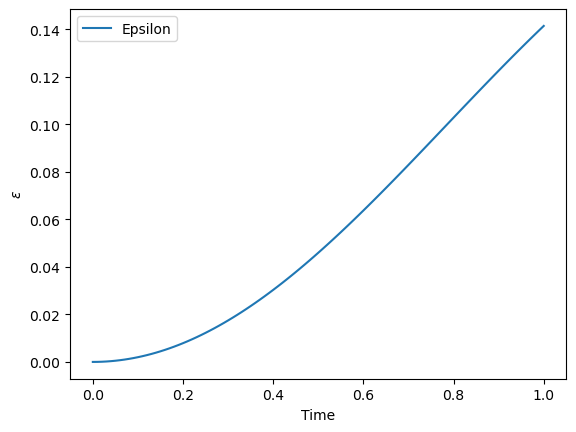

In [8]:
# graph the changes in epsilon respect to the time
plt.plot(time, epsilon, label = "Epsilon")

plt.xlabel('Time')
plt.ylabel('$\epsilon$')
plt.legend()

plt.savefig('first_simulation.png')
plt.show()


## General case
The generalization of the previous case is the following:\
Ideal system: **$e^{-iZs_1T}e^{-iZs_2T}e^{-iZs_3T}...e^{-iZs_mT}$** \
Noisy system: **$e^{-i(Z+\lambda{X})s_1T}e^{-i(Z+\lambda{X})s_2T}e^{-i(Z+\lambda{X})s_3T}...e^{-i(Z+\lambda{X})s_mT}$**
##### Error function:
**$\epsilon=||(e^{-i(Z+\lambda{X})s_1T}Ze^{-i(Z+\lambda{X})s_2T}Ze^{-i(Z+\lambda{X})s_3T}Ze^{-i(Z+\lambda{X})s_4T}Z...Ze^{-i(Z+\lambda{X})s_mT}Z) - e^{-iZT}||$**
### Simulation


In [10]:
def error_calculation(lambda_value, m, T, areEqual, s_values):
    prev_A = I
    
    # Case 1: Periodic DD when s1 = s2 = ... = sm 
    if (areEqual == True):
        for i in np.linspace(1,m,num=m):
            # even numbers
            if (i%2 == 0): 
                A = np.dot(prev_A, expm(-1j*(Z-lambda_value*X)*T/m)) 
                #prev_A * expm(-1j*(Z-lambda_value*X)*T/m)
            # odd numbers
            else:
                A = np.dot(prev_A, expm(-1j*(Z+lambda_value*X)*T/m))
                #prev_A * expm(-1j*(Z+lambda_value*X)*T/m)
            # updating the matrix A
            prev_A = A
    
    # Case 2: Concatenated DD or Uhrig DD when s has a different values       
    else:
        i = 1
        # simulating the equation 
        for s in s_values:
            # even numbers
            if (i%2 == 0):
                A = np.dot(prev_A, expm(-1j*(Z-lambda_value*X)*s*T))
                # prev_A * expm(-1j*(Z-lambda_value*X)*s*T)   
            # odd numbers
            else:
                A = np.dot(prev_A, expm(-1j*(Z+lambda_value*X)*s*T))
                # prev_A * expm(-1j*(Z+lambda_value*X)*s*T)
            # updating variables
            #print(A)
            prev_A = A 
            i+=1 
            
    B = expm(-1j*Z*T) 
    # calculate the difference between the ideal and noisy system
    difference = A - B
    # get the maximum eigen value of the difference matrix
    eigenvalues = svd(difference, compute_uv = False)
    max_eigenvalue = np.max(eigenvalues)
    #print("The error is ", max_eigenvalue)
    return max_eigenvalue

def UDD_calculate_s_values(m):
    s_values = []
    prev_t = 0
    for j in range(1, m+1):
        t = np.power(np.sin(j*np.pi/(2*m)), 2)
        s_values.append(t-prev_t)
        prev_t = t
    return s_values        


In [11]:
# creating the variables
m_value_c1 = []
m_value_c2 = [2,3,6,11]
m_value_c3 = [2,3,4,6,8,10]
error_c1 = []
error_c2 = []
error_c3 = []
new_cost_function = []

# set the value of lambda and T
lambda_value = 0.1
T = 0.1

print("Case 1 (PDD) Even ##########################")
for m in range(2,11,2):
    error_c1.append(error_calculation(lambda_value, m, T, True, []))
    m_value_c1.append(m)
    print("For m = " + str(m) + " the error is " + str(error_calculation(lambda_value, m, T, True, [])))

print("\nCase 2 (CDD) ##########################")
error_c2.append(error_calculation(lambda_value, 2, T, False, [1/2,1/2]))
print("For m = 2 the error is " + str(error_c2[0]))

error_c2.append(error_calculation(lambda_value, 3, T, False, [1/4,1/2,1/4]))
print("For m = 3 the error is " + str(error_c2[1]))

error_c2.append(error_calculation(lambda_value, 6, T, False, [1/8,1/4,1/8,1/8,1/4,1/8]))
print("For m = 6 the error is " + str(error_c2[2]))

error_c2.append(error_calculation(lambda_value, 11, T, False, [1/16,1/8,1/16,1/16,1/8,1/8,1/8,1/16,1/16,1/8,1/16]))
print("For m = 11 the error is " + str(error_c2[3]))


print("\nCase 3 (UDD) ##########################")
error_c3.append(error_calculation(lambda_value, 2, T, False, UDD_calculate_s_values(2)))
print("For m = 2 the error is " + str(error_c3[0]))

error_c3.append(error_calculation(lambda_value, 3, T, False, UDD_calculate_s_values(3)))
print("For m = 3 the error is " + str(error_c3[1]))

error_c3.append(error_calculation(lambda_value, 4, T, False, UDD_calculate_s_values(4)))
print("For m = 4 the error is " + str(error_c3[2]))

error_c3.append(error_calculation(lambda_value, 6, T, False, UDD_calculate_s_values(6)))
print("For m = 6 the error is " + str(error_c3[3]))
print(UDD_calculate_s_values(6))

error_c3.append(error_calculation(lambda_value, 6, T, False, UDD_calculate_s_values(8)))
print("For m = 8 the error is " + str(error_c3[4]))
print(UDD_calculate_s_values(8))


error_c3.append(error_calculation(lambda_value, 10, T, False, UDD_calculate_s_values(10)))
print("For m = 10 the error is " + str(error_c3[5]))
print(UDD_calculate_s_values(10))

new_cost_function.append(error_calculation(lambda_value, 2, T, False , [0.49998639557038543, 0.4999863877015606]))
new_cost_function.append(error_calculation(lambda_value, 3, T, False ,[0.2503137072669908, 0.49937669076855284, 0.2503137644598633]))
new_cost_function.append(error_calculation(lambda_value, 4, T, False ,[0.14652067442263988, 0.35348033581820415, 0.3534803759562432, 0.14652063492330833]))
new_cost_function.append(error_calculation(lambda_value, 6, T, False ,[0.10918143259589581, 0.22418092242925042, 0.16663797324054233, 0.16663808071020264, 0.22418100202623886, 0.10918135503596697]))
new_cost_function.append(error_calculation(lambda_value, 8, T, False ,[0.08924079087444758, 0.16077407391229162, 0.11306050513221587, 0.13692481820391217, 0.13692485295031442, 0.11306050687348511, 0.1607740761428444, 0.08924079435103938]))
new_cost_function.append(error_calculation(lambda_value, 10, T, False ,[0.07576000914327245, 0.12424965812668316, 0.08786550312605869, 0.11212974407457768, 0.09999521456274939, 0.09999522711562604, 0.11212973593574459, 0.08786550363659461, 0.12424965880561085, 0.07576000920025311]))


Case 1 (PDD) Even ##########################
For m = 2 the error is 0.0004995820845829024
For m = 4 the error is 0.0002496353782160249
For m = 6 the error is 0.00016640438462257455
For m = 8 the error is 0.0001247982491792856
For m = 10 the error is 9.983673349871192e-05

Case 2 (CDD) ##########################
For m = 2 the error is 0.0004995820845829024
For m = 3 the error is 1.249909813324557e-05
For m = 6 the error is 1.8775597696427797e-07
For m = 11 the error is 2.606462738292785e-08

Case 3 (UDD) ##########################
For m = 2 the error is 0.0004995820845829024
For m = 3 the error is 1.2499098133243837e-05
For m = 4 the error is 2.9031863259118986e-07
For m = 6 the error is 8.175186760529897e-08
[0.06698729810778066, 0.1830127018922193, 0.24999999999999994, 0.25, 0.18301270189221952, 0.06698729810778059]
For m = 8 the error is 4.455600939580585e-08
[0.03806023374435662, 0.10838637566236962, 0.16221167441072884, 0.1913417161825448, 0.19134171618254503, 0.1622116744107288, 0

In [12]:
# values found below

m_values_optimized = [2,3,4,6,8,10] 

error_optimized_L_BFGS = [0.0004995710092226035,1.0499157672316583e-10,8.978352908475881e-11,8.890320990889971e-11,5.141679886297138e-11,2.4382942128748028e-11]
error_optimized_SLSQP = [0.0004995820845829022,4.1629966060554234e-07,2.022379330615787e-07,6.973664578598431e-08,3.953291027580417e-08,2.634799692895878e-08]

### Graph t vs $\epsilon$

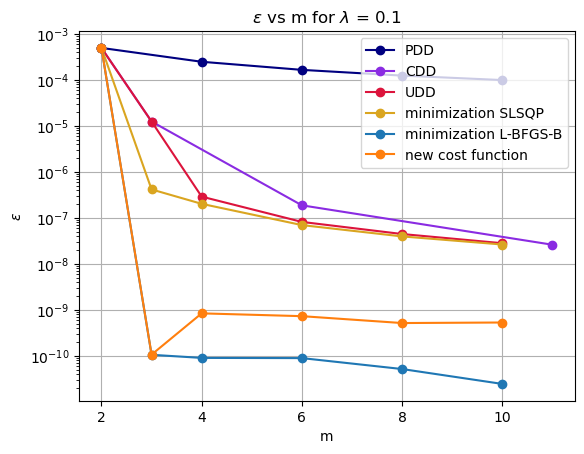

In [14]:
# graph the changes of the error for different values of m

plt.plot(m_value_c1, error_c1, color='navy', marker='o', label = "PDD")
plt.plot(m_value_c2, error_c2, color='blueviolet', marker='o', label = "CDD")
plt.plot(m_value_c3, error_c3, color='crimson', marker='o', label = "UDD")
plt.plot(m_values_optimized, error_optimized_SLSQP, color='goldenrod', marker='o', label = "minimization SLSQP")
plt.plot(m_values_optimized, error_optimized_L_BFGS, marker='o', label = "minimization L-BFGS-B")
plt.plot(m_values_optimized, new_cost_function , marker='o', label ="new cost function")


plt.title('$\epsilon$ vs m for $\lambda$ = 0.1')
plt.xlabel('m')
plt.ylabel('$\epsilon$')
plt.yscale("log")

plt.legend()
plt.grid()

plt.savefig('general_simulation.png')
plt.show()


## Minimize the $\epsilon$ function for a fixed T = 0.1 and m


### $\lambda\$ = 0.1 

In [17]:
def epsilon_func(s_values):
    i = 1
    prev_A = I
    lambda_value = 0.1
    T = 0.1
    # simulating the equation 
    for s in s_values:
        # even numbers
        if (i%2 == 0):
            A = prev_A @ expm(-1j*(Z-lambda_value*X)*s*T)   
        # odd numbers
        else:
            A = prev_A @ expm(-1j*(Z+lambda_value*X)*s*T)
        # updating variables
        prev_A = A 
        i+=1 
    difference = A - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon   

def minimize_epsilon_SLSQP(m, s_values_start):
    s_result = []
    # Define constraints
    const = ({'type':'eq',
              'fun' : lambda s_values : (np.sum(s_values) - 1)})
    # Bounds of Si
    bounds = ((0,1) for _ in range(m))

    # Options
    options = {'disp'    : False,
               'ftol'    : 1e-12,
               'eps'     : 1e-12,
               'maxiter' : 1000}

    # Minimization
    result = spo.minimize(epsilon_func, s_values_start, method='SLSQP', options=options, constraints = const, bounds = bounds)

    epsilon = result.fun
    for i in range(m):
        si = result.x[i]
        s_result.append(si)
    
    return s_result, epsilon 

def minimize_epsilon_BFGS(m, s_values_start):
    s_result = []
    # Bounds of Si
    bounds = ((0,1) for _ in range(m))

    # Options
    options = {'disp'    : False,
               'ftol'    : 1e-10}
    
    # Minimization
    result = spo.minimize(epsilon_func, s_values_start, method='L-BFGS-B', options= options, bounds = bounds)

    epsilon = result.fun
    for i in range(m):
        si = result.x[i]
        s_result.append(si)
        
    return s_result, epsilon 

def return_min_value(iterations, m_value, method):
    hashmap_epsilon_to_s = {}
    if(method == 'SLSQP'):
        # random initial values
        for i in range(iterations):
            s_values, epsilon = minimize_epsilon_SLSQP(m_value,[np.random.random() for _ in range(m_value)])
            hashmap_epsilon_to_s[epsilon] = s_values
        # evenly separated initial values
        s_values, epsilon = minimize_epsilon_SLSQP(m_value, [1/m_value for _ in range(m_value)])
        hashmap_epsilon_to_s[epsilon] = s_values
        # s-values of UDD
        s_values, epsilon = minimize_epsilon_SLSQP(m_value, UDD_calculate_s_values(m_value))
        hashmap_epsilon_to_s[epsilon] = s_values
        
    elif(method == 'L-BFGS-B'):
        # random initial values
        for i in range(iterations):
            s_values, epsilon = minimize_epsilon_BFGS(m_value,[np.random.random() for _ in range(m_value)])
            hashmap_epsilon_to_s[epsilon] = s_values
        # evenly separated initial values
        s_values, epsilon = minimize_epsilon_BFGS(m_value, [1/m_value for _ in range(m_value)])
        hashmap_epsilon_to_s[epsilon] = s_values
        # s-values of UDD
        s_values, epsilon = minimize_epsilon_BFGS(m_value, UDD_calculate_s_values(m_value))
        hashmap_epsilon_to_s[epsilon] = s_values
            
    else:
        print("invalid method")

    #print(hashmap_epsilon_to_s) 
    min_value = min(hashmap_epsilon_to_s)
    
    return min_value, hashmap_epsilon_to_s[min_value] 


#### When m = 2

In [19]:
# m_value = 2

# epsilon, s_values = return_min_value(50, m_value, 'SLSQP')
# print("SLSQP METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

# epsilon, s_values = return_min_value(50, m_value, 'L-BFGS-B')
# print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

In [20]:
# Minimum values found by SLSQP Method
print("Minimum values found by SLSQP Method")
print(epsilon_func([0.4999999999999999, 0.5000000000000001]))
print(epsilon_func([0.49999999991086985, 0.50000000008913]))
print(epsilon_func([0.49999999967918407, 0.500000000320816]))

# Minimum values found by L-BFGS-B Method
print("Minimum values found by L-BFGS-B Method")
print(epsilon_func([0.4999833655591059, 0.49998336523893533]))
print(epsilon_func([0.4999833675827254, 0.4999833660701465]))

Minimum values found by SLSQP Method
0.0004995820845829024
0.0004995820845829022
0.0004995820845829022
Minimum values found by L-BFGS-B Method
0.0004995710092227769
0.0004995710092226035


#### When m = 3

In [22]:
# m_value = 3

# epsilon, s_values = return_min_value(50, m_value, 'SLSQP')
# print("SLSQP METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

# epsilon, s_values = return_min_value(50, m_value, 'L-BFGS-B')
# print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

In [23]:
# Minimum values found by SLSQP Method
print("Minimum values found by SLSQP Method")
print(epsilon_func([0.2503126942309021, 0.4993746112692983, 0.2503126944997997]))
print(epsilon_func([0.25031268630866343, 0.4993746037748959, 0.2503127099170955]))
print(epsilon_func([0.25031262798463816, 0.4993746105027046, 0.2503127615133109]))

# Minimum values found by L-BFGS-B Method
print("Minimum values found by L-BFGS-B Method")
print(epsilon_func([0.250313761135165, 0.499376680102535, 0.25031372106888927]))
print(epsilon_func([0.25031378610463756, 0.4993766826139664, 0.25031369349300925]))
print(epsilon_func([0.2503137962229766, 0.49937668537468544, 0.25031368125624537]))
print(epsilon_func([0.25031371327935265, 0.4993766930214737, 0.25031375690714536]))
print(epsilon_func([0.2503137368651768, 0.4993766924176038, 0.2503137334573409]))


Minimum values found by SLSQP Method
4.1629970434291533e-07
4.1629966617393165e-07
4.1629966060554234e-07
Minimum values found by L-BFGS-B Method
1.6462962811950578e-10
1.5398324322674896e-10
1.23607621609174e-10
1.1724468095591725e-10
1.0499157672316583e-10


#### When m = 4


In [25]:
# m_value = 4

# epsilon, s_values = return_min_value(50, m_value, 'SLSQP')
# print("SLSQP METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

# epsilon, s_values = return_min_value(50, m_value, 'L-BFGS-B')
# print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

In [26]:
# Minimum values found by SLSQP Method
print("Minimum values found by SLSQP Method")
print(epsilon_func([0.14657893998012378, 0.35342105961862347, 0.3534210602510726, 0.1465789401501801]))
print(epsilon_func([0.14652032059044803, 0.353479681868749, 0.3534796794126597, 0.14652031812814334]))
print(epsilon_func([0.14652031895308476, 0.3534796801977871, 0.35347968104132854, 0.14652031980779961]))

# Minimum values found by L-BFGS-B Method
print("Minimum values found by L-BFGS-B Method")
print(epsilon_func([0.16614280597213285, 0.37414686793828494, 0.3339591267076344, 0.12575327870472833]))
print(epsilon_func([0.164781674448304, 0.37263571703012993, 0.33531305684028445, 0.12727162321540195]))
print(epsilon_func([0.1596253941923827, 0.36701953547251415, 0.3404423532130092, 0.13291476430976581]))
print(epsilon_func([0.14088443782003518, 0.34796007087020453, 0.35908864066997925, 0.15206887792518864]))
print(epsilon_func([0.1390527655437397, 0.3462030623440974, 0.36091132593745834, 0.15383487541326007]))

Minimum values found by SLSQP Method
2.6139756841637346e-07
2.022379330615787e-07
2.0223793306955613e-07
Minimum values found by L-BFGS-B Method
1.1587775829472187e-10
1.1071111414638147e-10
1.0872717407848118e-10
9.63569131446272e-11
8.978352908475881e-11


#### When m = 6

In [28]:
# m_value = 6

# epsilon, s_values = return_min_value(50, m_value, 'SLSQP')
# print("SLSQP METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

# epsilon, s_values = return_min_value(50, m_value, 'L-BFGS-B')
# print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

In [29]:
# Minimum values found by SLSQP Method
print("Minimum values found by SLSQP Method")
print(epsilon_func([0.10910832178667179, 0.22407446256631602, 0.16682740781295394, 0.16683724450407955, 0.22406431048024267, 0.10908825284973601]))
print(epsilon_func([0.10588111287187135, 0.23477599597343882, 0.20813314114895248, 0.17445904822125238, 0.18598807981730012, 0.09076262196718503]))
print(epsilon_func([0.08115803715423694, 0.19088757688004415, 0.21217126097154654, 0.21792587193270252, 0.20666020397943302, 0.09119704908203678]))

# Minimum values found by L-BFGS-B Method
print("Minimum values found by L-BFGS-B Method")
print(epsilon_func([3.002568575565669e-11, 0.19226485891928957, 0.20052717820453525, 0.0968542222853414, 0.29898736358357786, 0.21136866390320677]))
print(epsilon_func([0.18318333858053404, 0.19762749926476317, 0.0017600867329253978, 0.1976272306137198, 0.31525492323346144, 0.10454913737516315]))
print(epsilon_func([0.1193189747626099, 0.13300726613836156, 0.09491711204974132, 0.2599696875342908, 0.2858709215136466, 0.10691726277087903]))
print(epsilon_func([0.12227497219810501, 0.17806746041581603, 0.09024379222233403, 0.20065699260650854, 0.2875240364733113, 0.12123386877698408]))
print(epsilon_func([0.10246441832434755, 0.285663802125686, 0.3429836136700454, 0.21010284229915774, 0.0544647821265309, 0.004322065714780376]))
print(epsilon_func([0.17670656493901502, 0.34805266523857575, 0.15616049874046606, 0.0739055201131409, 0.16733898363983243, 0.07783733275502275]))

Minimum values found by SLSQP Method
7.705138206728516e-08
7.252268247101637e-08
6.973664578598431e-08
Minimum values found by L-BFGS-B Method
1.952486531829233e-10
1.5322952731012476e-10
2.1968106284531744e-10
1.1930137326351278e-10
1.5760827865285895e-10
8.890320990889971e-11


#### When m = 8

In [31]:
# m_value = 8

# epsilon, s_values = return_min_value(50, m_value, 'SLSQP')
# print("SLSQP METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

# epsilon, s_values = return_min_value(50, m_value, 'L-BFGS-B')
# print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

In [32]:
# Minimum values found by SLSQP Method
print("Minimum values found by SLSQP Method")
print(epsilon_func([0.08915028332374811, 0.16066107804400595, 0.11316561091250425, 0.13702441164206514, 0.13702361737515267, 0.11316624492816715, 0.16066046721461813, 0.08914828655973867]))
print(epsilon_func([0.08915004552240306, 0.16066103188805328, 0.11316580035396968, 0.13702439761109078, 0.13702366410074956, 0.11316639014088864, 0.1606604938519956, 0.08914817653084944]))
print(epsilon_func([0.05935928565046837, 0.12948460286044516, 0.106214630589151, 0.12537400745591146, 0.16873353431206917, 0.1570677605596407, 0.1656400225308929, 0.08812615604142127]))

# Minimum values found by L-BFGS-B Method
print("Minimum values found by L-BFGS-B Method")
print(epsilon_func([0.13406083458828458, 0.13345016079009892, 0.06339083938260887, 0.10792967735708747, 0.027611282075697324, 0.15792916335235058, 0.27507579732908255, 0.10055345481144032]))
print(epsilon_func([0.10411501670327519, 0.13704351618314636, 0.05570086903062917, 0.11607893667874317, 0.063154546027316, 0.11273311670888113, 0.27700220278078264, 0.1341727685490789]))
print(epsilon_func([0.13543790031373729, 0.3054044138804244, 0.1872558616467772, 2.472839749136672e-07, 0.055520231283083046, 0.11177620353198638, 0.1218184630497779, 0.08278779985410627]))
print(epsilon_func([0.05339434090956381, 0.13405811994671749, 0.001967550281390055, 0.1252082337538231, 0.3928911679866941, 0.18515655633140052, 0.05144043213742607, 0.05588568024121955]))
print(epsilon_func([0.10921175417313747, 0.2141729732872108, 0.03554963076706746, 0.09358414868964617, 0.3081488510078989, 0.17119862167198385, 0.04702451535675219, 0.021110777948649396]))
print(epsilon_func([0.24942741683975225, 0.10553175343739075, 0.0011230792719756277, 0.39384581158312054, 0.21074545058642039, 2.3625845758521332e-08, 0.03933058520223507, 2.385284448579664e-08]))

Minimum values found by SLSQP Method
4.216038554660022e-08
4.215670861686065e-08
3.953291027580417e-08
Minimum values found by L-BFGS-B Method
1.540095240202482e-10
1.5155044798874508e-10
1.4641127537647506e-10
1.280814530593076e-10
1.0484929189009804e-10
5.141679886297138e-11


#### When m = 10

In [34]:
# m_value = 10

# epsilon, s_values = return_min_value(50, m_value, 'SLSQP')
# print("SLSQP METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

# epsilon, s_values = return_min_value(200, m_value, 'L-BFGS-B')
# print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

In [35]:
# Minimum values found by SLSQP Method
print("Minimum values found by SLSQP Method")
print(epsilon_func([0.07568406622439884, 0.12416062524225233, 0.08791055975462658, 0.1121677280036812, 0.10007795514711366, 0.10007792212745426, 0.11216738715940267, 0.08791025208764376, 0.12416003600225003, 0.07568346825117656]))
print(epsilon_func( [0.07568326384617458, 0.12415965053330888, 0.08791044430577105, 0.11216767691755845, 0.1000782598670787, 0.10007850169535733, 0.1121679190300437, 0.08791054519179863, 0.12416011511529271, 0.07568362349761602]))
print(epsilon_func([0.07586110104005189, 0.1225019616392503, 0.08800469513026972, 0.11406822520204672, 0.10051687658564909, 0.10053160844119684, 0.11012772537173067, 0.08761253265550466, 0.12549382784278126, 0.07528144609151938]))
print(epsilon_func([0.07451102582270869, 0.12459759912353278, 0.08826481300158277, 0.11052325707476751, 0.10072884116651735, 0.09998841175453334, 0.11288951692510786, 0.0894173716757356, 0.1236019555164731, 0.07547720793910773]))

# Minimum values found by L-BFGS-B Method
print("Minimum values found by L-BFGS-B Method")
print(epsilon_func([0.024471769814348752, 0.07101978892202189, 0.1106158990031438, 0.13938415692065945, 0.1545085251493619, 0.15450852514936264, 0.1393841569206586, 0.11061589900314339, 0.07101978892202118, 0.02447176981434826]))
print(epsilon_func([0.07576006209073353, 0.12424965703155033, 0.08786550910812496, 0.1121296992294115, 0.0999952050726772, 0.0999952147483519, 0.11212969571180409, 0.08786551439191806, 0.12424966489260345, 0.07576004532728677]))
print(epsilon_func([1.7829129530435448e-07, 0.05528569140982053, 0.1353838812753917, 6.698355004261724e-07, 0.0005043066254334524, 0.14971740760454286, 0.21893375189965195, 0.2948759048301394, 0.14529901848731552, 1.8162168354368122e-07]))
print(epsilon_func([0.11134101758396925, 0.24287679818993924, 0.0815400816835968, 0.09962227254581603, 0.14393330992598719, 3.115543944154551e-07, 0.08154058586076601, 3.128772343372055e-07, 0.0815405752411552, 0.15760617287419573]))
print(epsilon_func([0.033680395254111116, 0.10390490797511169, 0.14377888491216873, 0.1448751071961203, 0.08335694792253637, 0.06346115013195884, 0.008231097440471019, 0.06346172511496166, 0.23086145287168783, 0.12438890935826262]))
print(epsilon_func([0.08657598578630639, 0.021835457302605405, 0.08979011418999526, 0.010834726339421058, 0.03214214589938005, 0.14059605009233206, 0.03215848985140021, 0.27494734995871273, 0.25969232337431825, 0.05142947903376713]))
print(epsilon_func([0.013502638711667845, 0.10793849922623981, 0.013511386373038172, 0.10452034972165342, 0.19301381216791186, 0.08276559241719235, 0.2196831416133251, 9.054555847594774e-08, 0.059846681638992094, 0.20521990003465554]))
print(epsilon_func([0.14463021286832944, 0.25358576737150884, 0.11756763327001003, 2.9202566279419213e-05, 4.753675013465655e-09, 0.14633044969761538, 0.23790888903173354, 0.09282826085093417, 4.754553980460666e-09, 0.00712063413072551]))

print("\n", epsilon_func([0.4999833675827254, 0.4999833660701465]))
print(epsilon_func([0.2503137368651768, 0.4993766924176038, 0.2503137334573409]))
print(epsilon_func([0.1390527655437397, 0.3462030623440974, 0.36091132593745834, 0.15383487541326007]))
print(epsilon_func([0.17670656493901502, 0.34805266523857575, 0.15616049874046606, 0.0739055201131409, 0.16733898363983243, 0.07783733275502275]))
print(epsilon_func([0.24942741683975225, 0.10553175343739075, 0.0011230792719756277, 0.39384581158312054, 0.21074545058642039, 2.3625845758521332e-08, 0.03933058520223507, 2.385284448579664e-08]))
print(epsilon_func([0.14463021286832944, 0.25358576737150884, 0.11756763327001003, 2.9202566279419213e-05, 4.753675013465655e-09, 0.14633044969761538, 0.23790888903173354, 0.09282826085093417, 4.754553980460666e-09, 0.00712063413072551]))

Minimum values found by SLSQP Method
2.6777631758866682e-08
2.677741116572988e-08
2.6741893159598842e-08
2.634799692895878e-08
Minimum values found by L-BFGS-B Method
1.5116691413025667e-10
1.1841063874830328e-10
1.0152825536910817e-10
9.253189431275356e-11
7.406077198538352e-11
6.043210489378402e-11
5.3856741667156624e-11
2.4382942128748028e-11

 0.0004995710092226035
1.0499157672316583e-10
8.978352908475881e-11
8.890320990889971e-11
5.141679886297138e-11
2.4382942128748028e-11


### $\lambda\$ = 0.05

In [37]:
def epsilon_func(s_values):
    i = 1
    prev_A = I
    lambda_value = 0.05
    T = 0.1
    # simulating the equation 
    for s in s_values:
        # even numbers
        if (i%2 == 0):
            A = prev_A @ expm(-1j*(Z-lambda_value*X)*s*T)   
        # odd numbers
        else:
            A = prev_A @ expm(-1j*(Z+lambda_value*X)*s*T)
        # updating variables
        prev_A = A 
        i+=1 
    difference = A - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon   

In [38]:
# creating the variables
m_value_c1 = []
m_value_c2 = [2,3,6,11]
m_value_c3 = [2,3,4,6,8,10]
error_c1 = []
error_c2 = []
error_c3 = []
error_optimized_L_BFGS = []
new_cost_function = []

# set the value of lambda and T
lambda_value = 0.05
T = 0.1

print("Case 1 (PDD) Even ##########################")
for m in range(2,11,2):
    error_c1.append(error_calculation(lambda_value, m, T, True, []))
    m_value_c1.append(m)
    print("For m = " + str(m) + " the error is " + str(error_calculation(lambda_value, m, T, True, [])))

print("\nCase 2 (CDD) ##########################")
error_c2.append(error_calculation(lambda_value, 2, T, False, [1/2,1/2]))
print("For m = 2 the error is " + str(error_c2[0]))

error_c2.append(error_calculation(lambda_value, 3, T, False, [1/4,1/2,1/4]))
print("For m = 3 the error is " + str(error_c2[1]))

error_c2.append(error_calculation(lambda_value, 6, T, False, [1/8,1/4,1/8,1/8,1/4,1/8]))
print("For m = 6 the error is " + str(error_c2[2]))

error_c2.append(error_calculation(lambda_value, 11, T, False, [1/16,1/8,1/16,1/16,1/8,1/8,1/8,1/16,1/16,1/8,1/16]))
print("For m = 11 the error is " + str(error_c2[3]))


print("\nCase 3 (UDD) ##########################")
error_c3.append(error_calculation(lambda_value, 2, T, False, UDD_calculate_s_values(2)))
print("For m = 2 the error is " + str(error_c3[0]))

error_c3.append(error_calculation(lambda_value, 3, T, False, UDD_calculate_s_values(3)))
print("For m = 3 the error is " + str(error_c3[1]))

error_c3.append(error_calculation(lambda_value, 4, T, False, UDD_calculate_s_values(4)))
print("For m = 4 the error is " + str(error_c3[2]))

error_c3.append(error_calculation(lambda_value, 6, T, False, UDD_calculate_s_values(6)))
print("For m = 6 the error is " + str(error_c3[3]))

error_c3.append(error_calculation(lambda_value, 6, T, False, UDD_calculate_s_values(8)))
print("For m = 8 the error is " + str(error_c3[4]))

error_c3.append(error_calculation(lambda_value, 10, T, False, UDD_calculate_s_values(10)))
print("For m = 10 the error is " + str(error_c3[5]))

print("\n Minimization L-BFGS-B")

error_optimized_L_BFGS.append(epsilon_func([0.4999833675827254, 0.4999833660701465]))
error_optimized_L_BFGS.append(epsilon_func([0.2503137368651768, 0.4993766924176038, 0.2503137334573409]))
error_optimized_L_BFGS.append(epsilon_func([0.1390527655437397, 0.3462030623440974, 0.36091132593745834, 0.15383487541326007]))
error_optimized_L_BFGS.append(epsilon_func([0.17670656493901502, 0.34805266523857575, 0.15616049874046606, 0.0739055201131409, 0.16733898363983243, 0.07783733275502275]))
error_optimized_L_BFGS.append(epsilon_func([0.24942741683975225, 0.10553175343739075, 0.0011230792719756277, 0.39384581158312054, 0.21074545058642039, 2.3625845758521332e-08, 0.03933058520223507, 2.385284448579664e-08]))
error_optimized_L_BFGS.append(epsilon_func([0.14463021286832944, 0.25358576737150884, 0.11756763327001003, 2.9202566279419213e-05, 4.753675013465655e-09, 0.14633044969761538, 0.23790888903173354, 0.09282826085093417, 4.754553980460666e-09, 0.00712063413072551]))

new_cost_function.append(epsilon_func([0.49998639557038543, 0.4999863877015606]))
new_cost_function.append(epsilon_func([0.2503137072669908, 0.49937669076855284, 0.2503137644598633]))
new_cost_function.append(epsilon_func([0.14652067442263988, 0.35348033581820415, 0.3534803759562432, 0.14652063492330833]))
new_cost_function.append(epsilon_func([0.10918143259589581, 0.22418092242925042, 0.16663797324054233, 0.16663808071020264, 0.22418100202623886, 0.10918135503596697]))
new_cost_function.append(epsilon_func([0.08924079087444758, 0.16077407391229162, 0.11306050513221587, 0.13692481820391217, 0.13692485295031442, 0.11306050687348511, 0.1607740761428444, 0.08924079435103938]))
new_cost_function.append(epsilon_func([0.07576000914327245, 0.12424965812668316, 0.08786550312605869, 0.11212974407457768, 0.09999521456274939, 0.09999522711562604, 0.11212973593574459, 0.08786550363659461, 0.12424965880561085, 0.07576000920025311]))



Case 1 (PDD) Even ##########################
For m = 2 the error is 0.0002497915626468077
For m = 4 the error is 0.000124817753973501
For m = 6 the error is 8.320221152094574e-05
For m = 8 the error is 6.239913269222123e-05
For m = 10 the error is 4.991837089757513e-05

Case 2 (CDD) ##########################
For m = 2 the error is 0.0002497915626468077
For m = 3 the error is 6.246958492169307e-06
For m = 6 the error is 8.231441959358911e-08
For m = 11 the error is 6.529848307278701e-09

Case 3 (UDD) ##########################
For m = 2 the error is 0.00024979156264680753
For m = 3 the error is 6.246958492169307e-06
For m = 4 the error is 1.1574841579726834e-07
For m = 6 the error is 2.043797441379823e-08
For m = 8 the error is 1.1139003651881627e-08
For m = 10 the error is 7.0275814517046735e-09

 Minimization L-BFGS-B


In [39]:
print(epsilon_func([0.4999833675827254, 0.4999833660701465]))
print(epsilon_func([0.2503137368651768, 0.4993766924176038, 0.2503137334573409]))
print(epsilon_func([0.1390527655437397, 0.3462030623440974, 0.36091132593745834, 0.15383487541326007]))
print(epsilon_func([0.17670656493901502, 0.34805266523857575, 0.15616049874046606, 0.0739055201131409, 0.16733898363983243, 0.07783733275502275]))
print(epsilon_func([0.24942741683975225, 0.10553175343739075, 0.0011230792719756277, 0.39384581158312054, 0.21074545058642039, 2.3625845758521332e-08, 0.03933058520223507, 2.385284448579664e-08]))
print(epsilon_func([0.14463021286832944, 0.25358576737150884, 0.11756763327001003, 2.9202566279419213e-05, 4.753675013465655e-09, 0.14633044969761538, 0.23790888903173354, 0.09282826085093417, 4.754553980460666e-09, 0.00712063413072551]))

0.00024980263831025223
3.1219769447433755e-07
1.5217183791281817e-07
1.173858436946725e-07
3.108298611202534e-07
7.944510052493393e-08


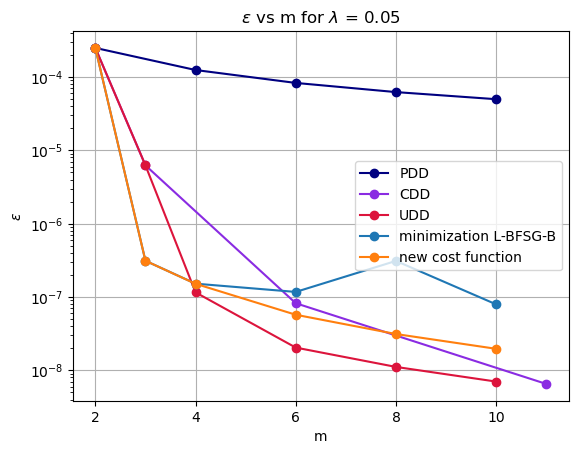

In [40]:
# graph the changes of the error for different values of m

plt.plot(m_value_c1, error_c1, color='navy', marker='o', label = "PDD")
plt.plot(m_value_c2, error_c2, color='blueviolet', marker='o', label = "CDD")
plt.plot(m_value_c3, error_c3, color='crimson', marker='o', label = "UDD")
plt.plot(m_values_optimized, error_optimized_L_BFGS, marker='o', label = "minimization L-BFSG-B")
plt.plot(m_values_optimized, new_cost_function , marker='o', label ="new cost function")

plt.title('$\epsilon$ vs m for $\lambda$ = 0.05')
plt.xlabel('m')
plt.ylabel('$\epsilon$')
plt.yscale("log")

plt.legend()
plt.grid()

plt.savefig('general_simulation_lambda_005.png')
plt.show()

### $\lambda\$ = 0.2

In [42]:
def epsilon_func(s_values):
    i = 1
    prev_A = I
    lambda_value = 0.2
    T = 0.1
    # simulating the equation 
    for s in s_values:
        # even numbers
        if (i%2 == 0):
            A = prev_A @ expm(-1j*(Z-lambda_value*X)*s*T)   
        # odd numbers
        else:
            A = prev_A @ expm(-1j*(Z+lambda_value*X)*s*T)
        # updating variables
        prev_A = A 
        i+=1 
    difference = A - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon 

In [43]:
# creating the variables
m_value_c1 = []
m_value_c2 = [2,3,6,11]
m_value_c3 = [2,3,4,6,8,10]
error_c1 = []
error_c2 = []
error_c3 = []
error_optimized_L_BFGS = []
new_cost_function = []

# set the value of lambda and T
lambda_value = 0.2
T = 0.1

print("Case 1 (PDD) Even ##########################")
for m in range(2,11,2):
    error_c1.append(error_calculation(lambda_value, m, T, True, []))
    m_value_c1.append(m)
    print("For m = " + str(m) + " the error is " + str(error_calculation(lambda_value, m, T, True, [])))

print("\nCase 2 (CDD) ##########################")
error_c2.append(error_calculation(lambda_value, 2, T, False, [1/2,1/2]))
print("For m = 2 the error is " + str(error_c2[0]))

error_c2.append(error_calculation(lambda_value, 3, T, False, [1/4,1/2,1/4]))
print("For m = 3 the error is " + str(error_c2[1]))

error_c2.append(error_calculation(lambda_value, 6, T, False, [1/8,1/4,1/8,1/8,1/4,1/8]))
print("For m = 6 the error is " + str(error_c2[2]))

error_c2.append(error_calculation(lambda_value, 11, T, False, [1/16,1/8,1/16,1/16,1/8,1/8,1/8,1/16,1/16,1/8,1/16]))
print("For m = 11 the error is " + str(error_c2[3]))


print("\nCase 3 (UDD) ##########################")
error_c3.append(error_calculation(lambda_value, 2, T, False, UDD_calculate_s_values(2)))
print("For m = 2 the error is " + str(error_c3[0]))

error_c3.append(error_calculation(lambda_value, 3, T, False, UDD_calculate_s_values(3)))
print("For m = 3 the error is " + str(error_c3[1]))

error_c3.append(error_calculation(lambda_value, 4, T, False, UDD_calculate_s_values(4)))
print("For m = 4 the error is " + str(error_c3[2]))

error_c3.append(error_calculation(lambda_value, 6, T, False, UDD_calculate_s_values(6)))
print("For m = 6 the error is " + str(error_c3[3]))

error_c3.append(error_calculation(lambda_value, 6, T, False, UDD_calculate_s_values(8)))
print("For m = 8 the error is " + str(error_c3[4]))

error_c3.append(error_calculation(lambda_value, 10, T, False, UDD_calculate_s_values(10)))
print("For m = 10 the error is " + str(error_c3[5]))

print("\n Minimization L-BFGS-B")

error_optimized_L_BFGS.append(epsilon_func([0.4999833675827254, 0.4999833660701465]))
error_optimized_L_BFGS.append(epsilon_func([0.2503137368651768, 0.4993766924176038, 0.2503137334573409]))
error_optimized_L_BFGS.append(epsilon_func([0.1390527655437397, 0.3462030623440974, 0.36091132593745834, 0.15383487541326007]))
error_optimized_L_BFGS.append(epsilon_func([0.17670656493901502, 0.34805266523857575, 0.15616049874046606, 0.0739055201131409, 0.16733898363983243, 0.07783733275502275]))
error_optimized_L_BFGS.append(epsilon_func([0.24942741683975225, 0.10553175343739075, 0.0011230792719756277, 0.39384581158312054, 0.21074545058642039, 2.3625845758521332e-08, 0.03933058520223507, 2.385284448579664e-08]))
error_optimized_L_BFGS.append(epsilon_func([0.14463021286832944, 0.25358576737150884, 0.11756763327001003, 2.9202566279419213e-05, 4.753675013465655e-09, 0.14633044969761538, 0.23790888903173354, 0.09282826085093417, 4.754553980460666e-09, 0.00712063413072551]))

new_cost_function.append(epsilon_func([0.49998639557038543, 0.4999863877015606]))
new_cost_function.append(epsilon_func([0.2503137072669908, 0.49937669076855284, 0.2503137644598633]))
new_cost_function.append(epsilon_func([0.14652067442263988, 0.35348033581820415, 0.3534803759562432, 0.14652063492330833]))
new_cost_function.append(epsilon_func([0.10918143259589581, 0.22418092242925042, 0.16663797324054233, 0.16663808071020264, 0.22418100202623886, 0.10918135503596697]))
new_cost_function.append(epsilon_func([0.08924079087444758, 0.16077407391229162, 0.11306050513221587, 0.13692481820391217, 0.13692485295031442, 0.11306050687348511, 0.1607740761428444, 0.08924079435103938]))
new_cost_function.append(epsilon_func([0.07576000914327245, 0.12424965812668316, 0.08786550312605869, 0.11212974407457768, 0.09999521456274939, 0.09999522711562604, 0.11212973593574459, 0.08786550363659461, 0.12424965880561085, 0.07576000920025311]))

Case 1 (PDD) Even ##########################
For m = 2 the error is 0.0009991558435156834
For m = 4 the error is 0.0004992697185853612
For m = 6 the error is 0.0003328084618916362
For m = 8 the error is 0.0002495963687167902
For m = 10 the error is 0.00019967340062630672

Case 2 (CDD) ##########################
For m = 2 the error is 0.0009991558435156834
For m = 3 the error is 2.503960218620909e-05
For m = 6 the error is 5.209638716820823e-07
For m = 11 the error is 1.0420364876343738e-07

Case 3 (UDD) ##########################
For m = 2 the error is 0.0009991558435156834
For m = 3 the error is 2.5039602186208232e-05
For m = 4 the error is 9.100787316906377e-07
For m = 6 the error is 3.2700717620582206e-07
For m = 8 the error is 1.7822395293308337e-07
For m = 10 the error is 1.1244126105725967e-07

 Minimization L-BFGS-B


In [44]:
print(epsilon_func([0.4999833675827254, 0.4999833660701465]))
print(epsilon_func([0.2503137368651768, 0.4993766924176038, 0.2503137334573409]))
print(epsilon_func([0.1390527655437397, 0.3462030623440974, 0.36091132593745834, 0.15383487541326007]))
print(epsilon_func([0.17670656493901502, 0.34805266523857575, 0.15616049874046606, 0.0739055201131409, 0.16733898363983243, 0.07783733275502275]))
print(epsilon_func([0.24942741683975225, 0.10553175343739075, 0.0011230792719756277, 0.39384581158312054, 0.21074545058642039, 2.3625845758521332e-08, 0.03933058520223507, 2.385284448579664e-08]))
print(epsilon_func([0.14463021286832944, 0.25358576737150884, 0.11756763327001003, 2.9202566279419213e-05, 4.753675013465655e-09, 0.14633044969761538, 0.23790888903173354, 0.09282826085093417, 4.754553980460666e-09, 0.00712063413072551]))

0.0009991170796608368
1.2489393587764487e-06
6.091064947435627e-07
4.69964281192977e-07
1.2433139062432554e-06
3.178209016992582e-07


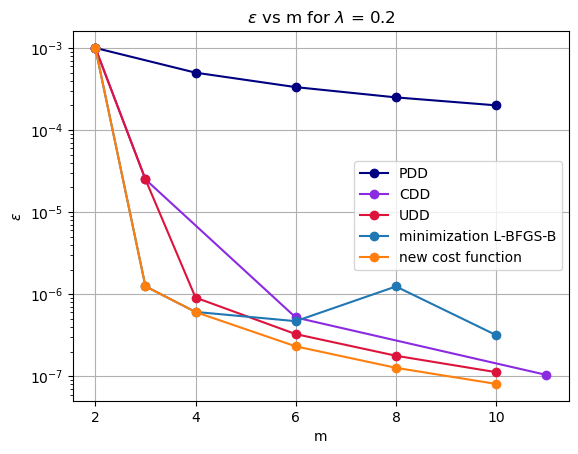

In [45]:
# graph the changes of the error for different values of m

plt.plot(m_value_c1, error_c1, color='navy', marker='o', label = "PDD")
plt.plot(m_value_c2, error_c2, color='blueviolet', marker='o', label = "CDD")
plt.plot(m_value_c3, error_c3, color='crimson', marker='o', label = "UDD")
plt.plot(m_values_optimized, error_optimized_L_BFGS, marker='o', label = "minimization L-BFGS-B")
plt.plot(m_values_optimized, new_cost_function , marker='o', label ="new cost function")

plt.title('$\epsilon$ vs m for $\lambda$ = 0.2')
plt.xlabel('m')
plt.ylabel('$\epsilon$')
plt.yscale("log")

plt.legend()
plt.grid()

plt.savefig('general_simulation_lambda_02.png')
plt.show()

### $\lambda$ = 0.15

In [47]:
def epsilon_func(s_values):
    i = 1
    prev_A = I
    lambda_value = 0.15
    T = 0.1
    # simulating the equation 
    for s in s_values:
        # even numbers
        if (i%2 == 0):
            A = prev_A @ expm(-1j*(Z-lambda_value*X)*s*T)   
        # odd numbers
        else:
            A = prev_A @ expm(-1j*(Z+lambda_value*X)*s*T)
        # updating variables
        prev_A = A 
        i+=1 
    difference = A - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon 

In [48]:
# creating the variables
m_value_c1 = []
m_value_c2 = [2,3,6,11]
m_value_c3 = [2,3,4,6,8,10]
error_c1 = []
error_c2 = []
error_c3 = []
error_optimized_L_BFGS = []
new_cost_function = []

# set the value of lambda and T
lambda_value = 0.15
T = 0.1

print("Case 1 (PDD) Even ##########################")
for m in range(2,11,2):
    error_c1.append(error_calculation(lambda_value, m, T, True, []))
    m_value_c1.append(m)
    print("For m = " + str(m) + " the error is " + str(error_calculation(lambda_value, m, T, True, [])))

print("\nCase 2 (CDD) ##########################")
error_c2.append(error_calculation(lambda_value, 2, T, False, [1/2,1/2]))
print("For m = 2 the error is " + str(error_c2[0]))

error_c2.append(error_calculation(lambda_value, 3, T, False, [1/4,1/2,1/4]))
print("For m = 3 the error is " + str(error_c2[1]))

error_c2.append(error_calculation(lambda_value, 6, T, False, [1/8,1/4,1/8,1/8,1/4,1/8]))
print("For m = 6 the error is " + str(error_c2[2]))

error_c2.append(error_calculation(lambda_value, 11, T, False, [1/16,1/8,1/16,1/16,1/8,1/8,1/8,1/16,1/16,1/8,1/16]))
print("For m = 11 the error is " + str(error_c2[3]))


print("\nCase 3 (UDD) ##########################")
error_c3.append(error_calculation(lambda_value, 2, T, False, UDD_calculate_s_values(2)))
print("For m = 2 the error is " + str(error_c3[0]))

error_c3.append(error_calculation(lambda_value, 3, T, False, UDD_calculate_s_values(3)))
print("For m = 3 the error is " + str(error_c3[1]))

error_c3.append(error_calculation(lambda_value, 4, T, False, UDD_calculate_s_values(4)))
print("For m = 4 the error is " + str(error_c3[2]))

error_c3.append(error_calculation(lambda_value, 6, T, False, UDD_calculate_s_values(6)))
print("For m = 6 the error is " + str(error_c3[3]))

error_c3.append(error_calculation(lambda_value, 6, T, False, UDD_calculate_s_values(8)))
print("For m = 8 the error is " + str(error_c3[4]))

error_c3.append(error_calculation(lambda_value, 10, T, False, UDD_calculate_s_values(10)))
print("For m = 10 the error is " + str(error_c3[5]))

print("\n Minimization L-BFGS-B")

error_optimized_L_BFGS.append(epsilon_func([0.4999833675827254, 0.4999833660701465]))
error_optimized_L_BFGS.append(epsilon_func([0.2503137368651768, 0.4993766924176038, 0.2503137334573409]))
error_optimized_L_BFGS.append(epsilon_func([0.1390527655437397, 0.3462030623440974, 0.36091132593745834, 0.15383487541326007]))
error_optimized_L_BFGS.append(epsilon_func([0.17670656493901502, 0.34805266523857575, 0.15616049874046606, 0.0739055201131409, 0.16733898363983243, 0.07783733275502275]))
error_optimized_L_BFGS.append(epsilon_func([0.24942741683975225, 0.10553175343739075, 0.0011230792719756277, 0.39384581158312054, 0.21074545058642039, 2.3625845758521332e-08, 0.03933058520223507, 2.385284448579664e-08]))
error_optimized_L_BFGS.append(epsilon_func([0.14463021286832944, 0.25358576737150884, 0.11756763327001003, 2.9202566279419213e-05, 4.753675013465655e-09, 0.14633044969761538, 0.23790888903173354, 0.09282826085093417, 4.754553980460666e-09, 0.00712063413072551]))

new_cost_function.append(epsilon_func([0.49998639557038543, 0.4999863877015606]))
new_cost_function.append(epsilon_func([0.2503137072669908, 0.49937669076855284, 0.2503137644598633]))
new_cost_function.append(epsilon_func([0.14652067442263988, 0.35348033581820415, 0.3534803759562432, 0.14652063492330833]))
new_cost_function.append(epsilon_func([0.10918143259589581, 0.22418092242925042, 0.16663797324054233, 0.16663808071020264, 0.22418100202623886, 0.10918135503596697]))
new_cost_function.append(epsilon_func([0.08924079087444758, 0.16077407391229162, 0.11306050513221587, 0.13692481820391217, 0.13692485295031442, 0.11306050687348511, 0.1607740761428444, 0.08924079435103938]))
new_cost_function.append(epsilon_func([0.07576000914327245, 0.12424965812668316, 0.08786550312605869, 0.11212974407457768, 0.09999521456274939, 0.09999522711562604, 0.11212973593574459, 0.08786550363659461, 0.12424965880561085, 0.07576000920025311]))

Case 1 (PDD) Even ##########################
For m = 2 the error is 0.0007493705251036311
For m = 4 the error is 0.0003744527429967735
For m = 6 the error is 0.00024960648088585185
For m = 8 the error is 0.00018719733325582488
For m = 10 the error is 0.00014975507950713664

Case 2 (CDD) ##########################
For m = 2 the error is 0.0007493705251036311
For m = 3 the error is 1.8761592853130126e-05
For m = 6 the error is 3.314797848855356e-07
For m = 11 the error is 5.8622558945457626e-08

Case 3 (UDD) ##########################
For m = 2 the error is 0.000749370525103631
For m = 3 the error is 1.876159285313038e-05
For m = 4 the error is 5.5203597846019e-07
For m = 6 the error is 1.8394163088956345e-07
For m = 8 the error is 1.0025100127048482e-07
For m = 10 the error is 6.324822045383253e-08

 Minimization L-BFGS-B


In [49]:
print(epsilon_func([0.4999833675827254, 0.4999833660701465]))
print(epsilon_func([0.2503137368651768, 0.4993766924176038, 0.2503137334573409]))
print(epsilon_func([0.1390527655437397, 0.3462030623440974, 0.36091132593745834, 0.15383487541326007]))
print(epsilon_func([0.17670656493901502, 0.34805266523857575, 0.15616049874046606, 0.0739055201131409, 0.16733898363983243, 0.07783733275502275]))
print(epsilon_func([0.24942741683975225, 0.10553175343739075, 0.0011230792719756277, 0.39384581158312054, 0.21074545058642039, 2.3625845758521332e-08, 0.03933058520223507, 2.385284448579664e-08]))
print(epsilon_func([0.14463021286832944, 0.25358576737150884, 0.11756763327001003, 2.9202566279419213e-05, 4.753675013465655e-09, 0.14633044969761538, 0.23790888903173354, 0.09282826085093417, 4.754553980460666e-09, 0.00712063413072551]))

0.0007493446823307149
5.204105672335187e-07
2.538437304716488e-07
1.9586786642512865e-07
5.1804861898541e-07
1.3243023320997277e-07


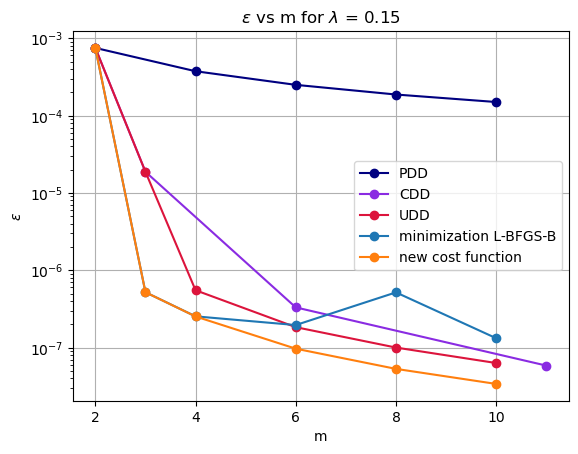

In [50]:
# graph the changes of the error for different values of m

plt.plot(m_value_c1, error_c1, color='navy', marker='o', label = "PDD")
plt.plot(m_value_c2, error_c2, color='blueviolet', marker='o', label = "CDD")
plt.plot(m_value_c3, error_c3, color='crimson', marker='o', label = "UDD")
plt.plot(m_values_optimized, error_optimized_L_BFGS, marker='o', label = "minimization L-BFGS-B")
plt.plot(m_values_optimized, new_cost_function , marker='o', label ="new cost function")

plt.title('$\epsilon$ vs m for $\lambda$ = 0.15')
plt.xlabel('m')
plt.ylabel('$\epsilon$')
plt.yscale("log")

plt.legend()
plt.grid()

plt.savefig('general_simulation_lambda_015.png')
plt.show()

## New cost funciton to minimize
$C_{new} = (\lambda=0.1) + (\lambda=0.05) + (\lambda=0.15)$ 

In [52]:
# def epsilon_func_diff_lambda(s_values,lambda_value):
#     i = 1
#     prev_A = I
#     T = 0.1
#     # simulating the equation 
#     for s in s_values:
#         # even numbers
#         if (i%2 == 0):
#             A = prev_A @ expm(-1j*(Z-lambda_value*X)*s*T)   
#         # odd numbers
#         else:
#             A = prev_A @ expm(-1j*(Z+lambda_value*X)*s*T)
#         # updating variables
#         prev_A = A 
#         i+=1 
#     difference = A - expm(-1j*Z*T)
#     eigenvalues = svd(difference, compute_uv = False)
#     epsilon = np.max(eigenvalues)
#     return epsilon 

# def epsilon_func(s_values):
#     epsilon = epsilon_func_diff_lambda(s_values, 0.05) + epsilon_func_diff_lambda(s_values, 0.1) + epsilon_func_diff_lambda(s_values,0.15)
#     return epsilon

# m_value = 2
# epsilon, s_values = return_min_value(70, m_value, 'L-BFGS-B')
# print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

# m_value = 3
# epsilon, s_values = return_min_value(70, m_value, 'L-BFGS-B')
# print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

# m_value = 4
# epsilon, s_values = return_min_value(70, m_value, 'L-BFGS-B')
# print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

# m_value = 6
# epsilon, s_values = return_min_value(70, m_value, 'L-BFGS-B')
# print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

# m_value = 8
# epsilon, s_values = return_min_value(70, m_value, 'L-BFGS-B')
# print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

# m_value = 10
# epsilon, s_values = return_min_value(70, m_value, 'L-BFGS-B')
# print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

# # L-BFGS-B METHOD: Minimum error =  0.0014987169870842865  s_values:  [0.49998639557038543, 0.4999863877015606]
# # L-BFGS-B METHOD: Minimum error =  8.32714066451501e-07  s_values:  [0.2503137072669908, 0.49937669076855284, 0.2503137644598633]
# # L-BFGS-B METHOD: Minimum error =  4.0531831447418387e-07  s_values:  [0.14652067442263988, 0.35348033581820415, 0.3534803759562432, 0.14652063492330833]
# # L-BFGS-B METHOD: Minimum error =  1.550039698177586e-07  s_values:  [0.10918143259589581, 0.22418092242925042, 0.16663797324054233, 0.16663808071020264, 0.22418100202623886, 0.10918135503596697]
# # L-BFGS-B METHOD: Minimum error =  8.495135431665464e-08  s_values:  [0.08924079087444758, 0.16077407391229162, 0.11306050513221587, 0.13692481820391217, 0.13692485295031442, 0.11306050687348511, 0.1607740761428444, 0.08924079435103938]
# # L-BFGS-B METHOD: Minimum error =  5.4159100182155515e-08  s_values:  [0.07576000914327245, 0.12424965812668316, 0.08786550312605869, 0.11212974407457768, 0.09999521456274939, 0.09999522711562604, 0.11212973593574459, 0.08786550363659461, 0.12424965880561085, 0.07576000920025311]



## Cost function for robust $\lambda$

### Simple example: $m=2, T = 0.1$
$\Vert\int_0^T dt  U^2(t)\Vert^2 = \Vert\int_0^{s_2}  e^{-2itTZ} dt\Vert^2 + \Vert\int_{s_2}^{s_1+s_2} e^{-2itTZ} dt\Vert^2 = \Vert\int_0^{s_1 + s_2}  e^{-2itTZ} dt\Vert^2$ 

In [102]:
def integral_1(t,T):
    return np.cos(2*t*T)
def integral_2(t,T):
    return -1j*np.sin(2*t*T)


def integral(t, T):
    return expm(-2j * t * T * Z)

def cost_func(s_terms):
    s1, s2 = s_terms
    T = 0.1
    first_term, _ = quad(integral_1, 0, s1+s2, args=(T)) 
    second_term, _= quad(integral_2, 0, s1+s2, args=(T), complex_func=True) 

    first_term *= I
    second_term *= Z
    
    eigenvalues_first_term = svd(first_term, compute_uv = False)
    eigenvalues_second_term = svd(second_term, compute_uv = False)
    print(eigenvalues_first_term, eigenvalues_second_term)
    first_max = np.max(eigenvalues_first_term)
    second_max = np.max(eigenvalues_second_term)

    return first_max**2 + second_max ** 2


In [104]:
# starting values
s_values_start = [np.random.random(), np.random.random()]

const = ({'type':'eq',
        'fun' : lambda s_values : (np.sum(s_values) - 1)})

# Bounds of Si
bounds = ((0,1) for _ in range(2))

# Options
options = {'disp'    : False,
            'ftol'    : 1e-10}
    
# Minimization
result = spo.minimize(epsilon_func, s_values_start, method='SLSQP', options=options, constraints = const, bounds = bounds)


epsilon = result.fun

s1, s2 = result.x

print("s1 = ", s1, " s2 = ", s2)

s1 =  0.5000000163089711  s2 =  0.49999998369102905
